## Zomato Analysis

# Domian: E-commerce

----------------

# -About:-

In this project, we aim to analyze Zomato restaurant data to identify key factors
that contribute to the success of restaurants, as measured by their ratings. By
exploring various features such as location, cuisine, pricing, and service
offerings, we aim to provide insights that can help restaurant owners and
Zomato users make informed decisions.

--------------

# -EDA With Zomato Data

Exploratory Data Analysis (EDA) serves as an initial phase in the realm of
Machine Learning, extensively employed to gain a profound understanding
of the dataset. While not mandatory for model development, EDA is strongly
recommended as it facilitates a nuanced comprehension of the data. When
executed meticulously, EDA unveils insights that may not be readily
apparent.

-------------

## -Data-Dictionary:

1. **Restaurant Name**
2. **City**
3. **Location**
4. **Cuisines**
5. **Price Range**
6. **Opentable_support & Delivery**
7. **Aggregate Rating**
8. **Rating Text**
9. **Votes** 
10. **Restaurant Chain**
11. **Features**


## -Project Flow:-

1. Data Loading
2. Data Cleaning
    - Handling missing values
    - Handling outliers

3. Conclusions and Recommendations
---------------------


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Indian-Resturants.csv")

In [3]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


## Data Overview:
Explore the basic characteristics of the dataset, including dimensions, data
types, and missing values.


In [4]:
data.shape

(211944, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [6]:
data.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

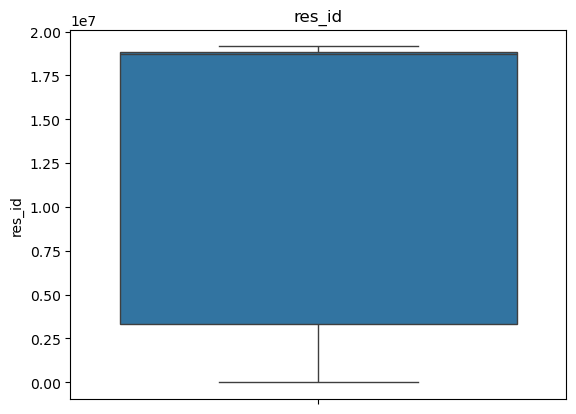

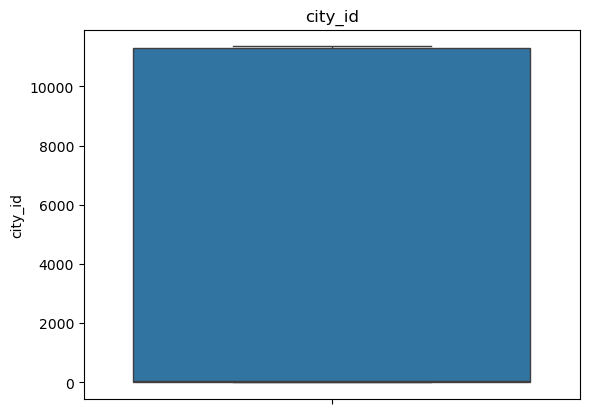

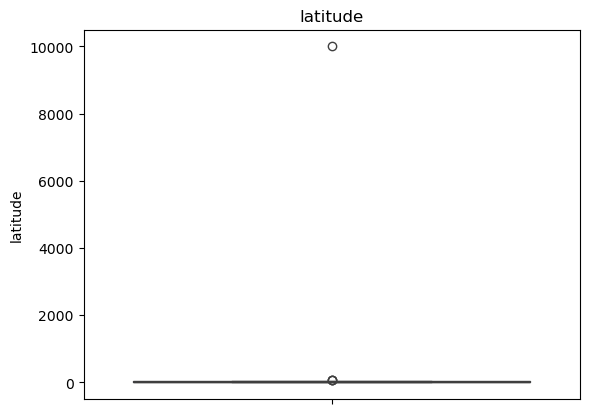

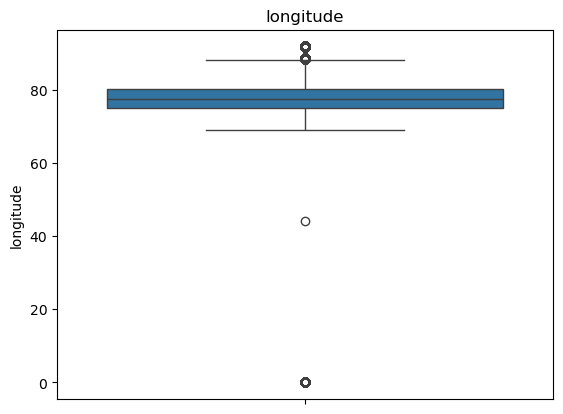

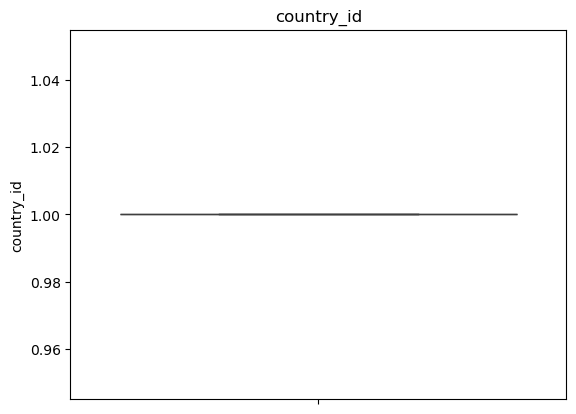

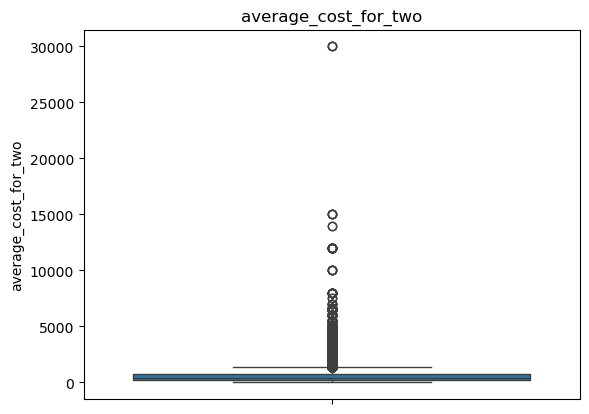

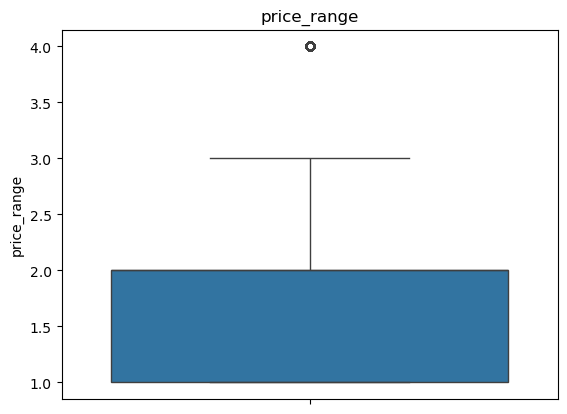

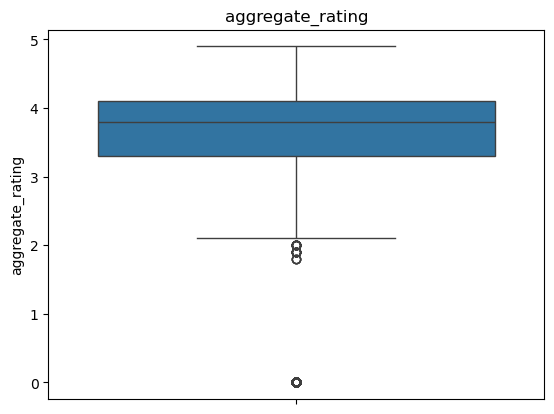

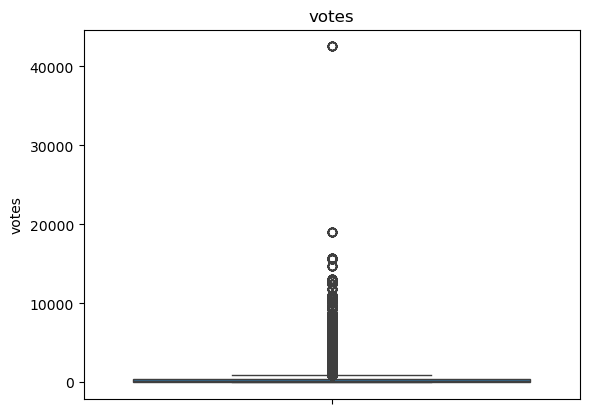

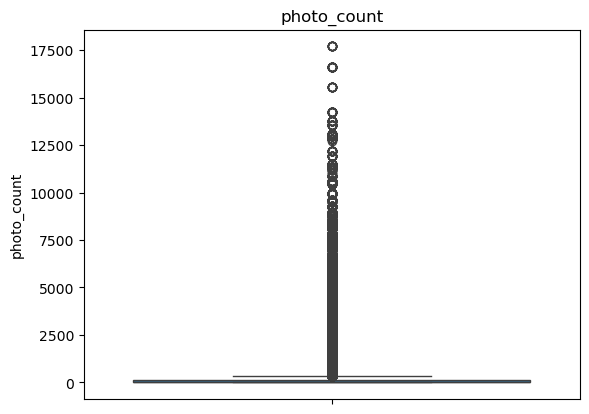

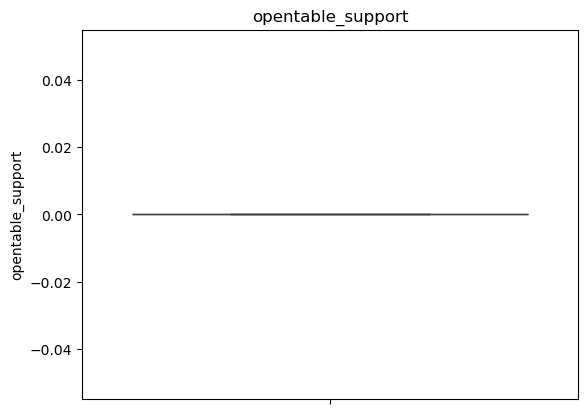

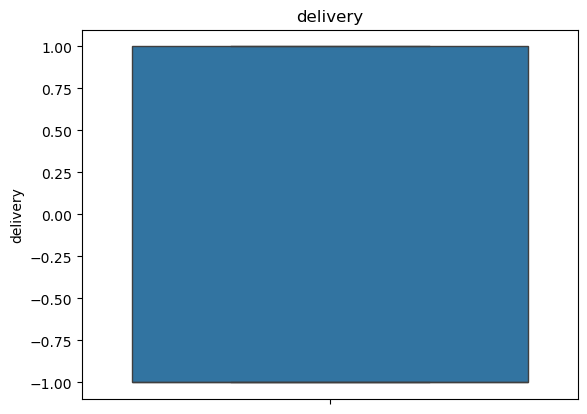

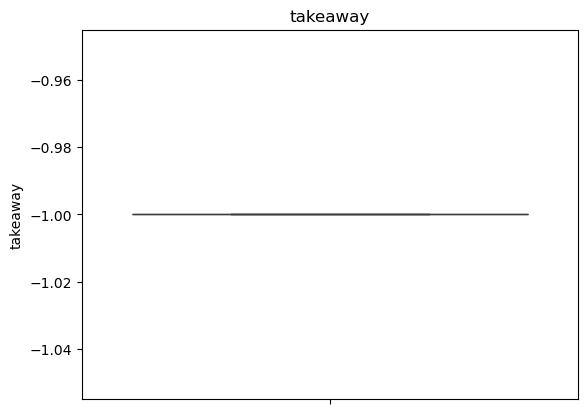

In [7]:
# Handling Outliers and cleaning data 

for i in data.select_dtypes(include= ["int64", "float64"]):
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

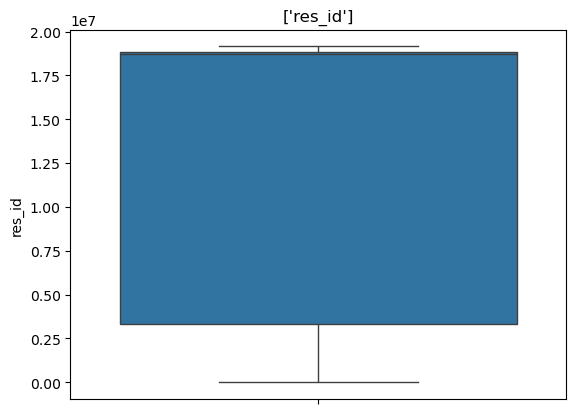

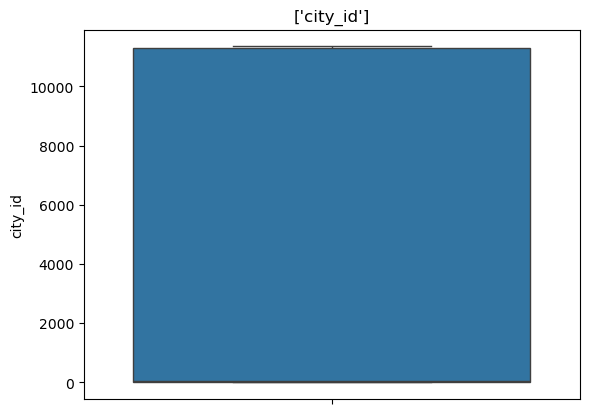

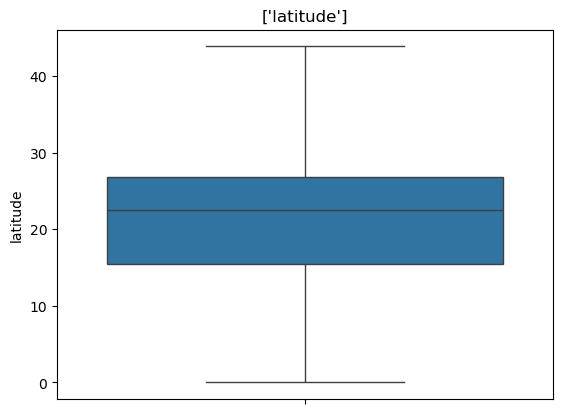

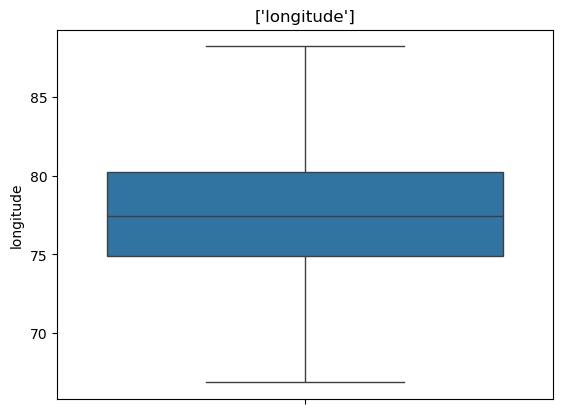

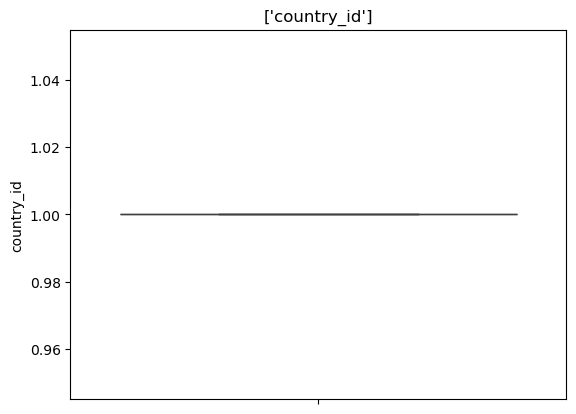

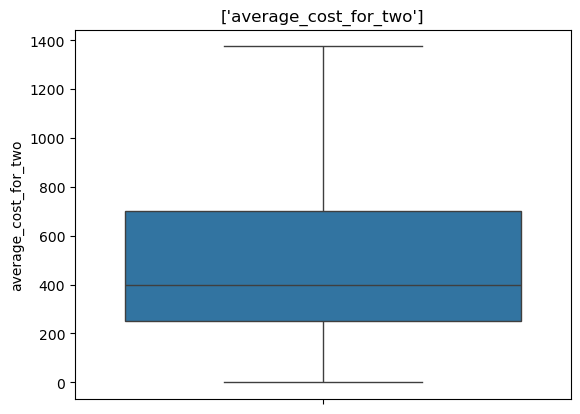

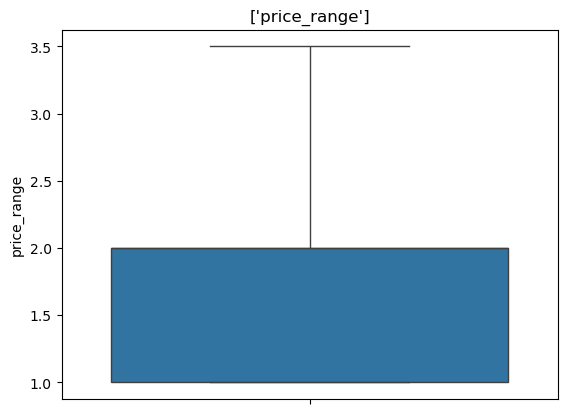

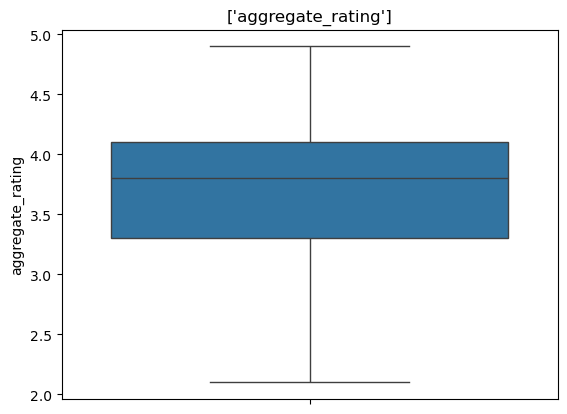

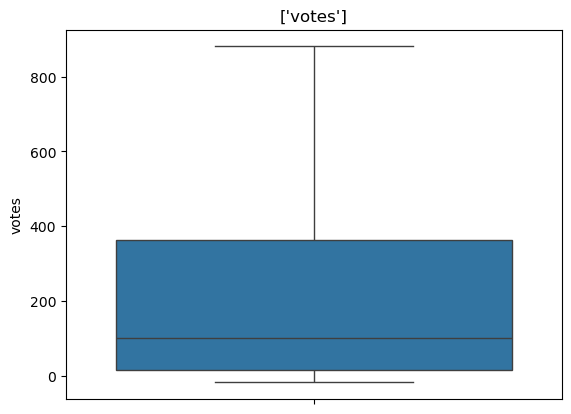

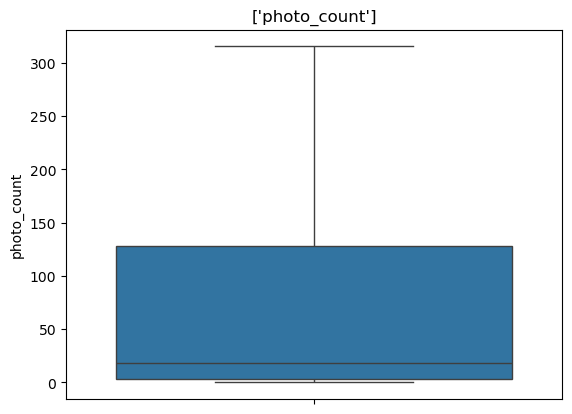

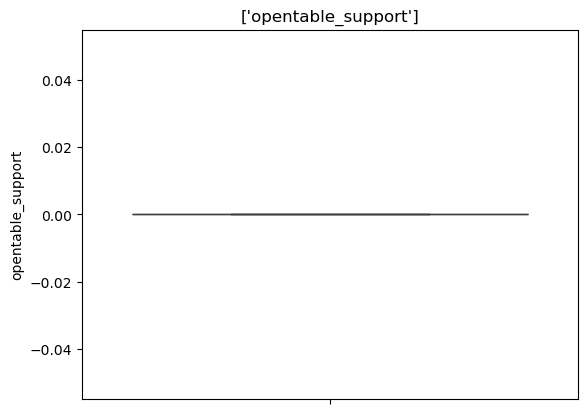

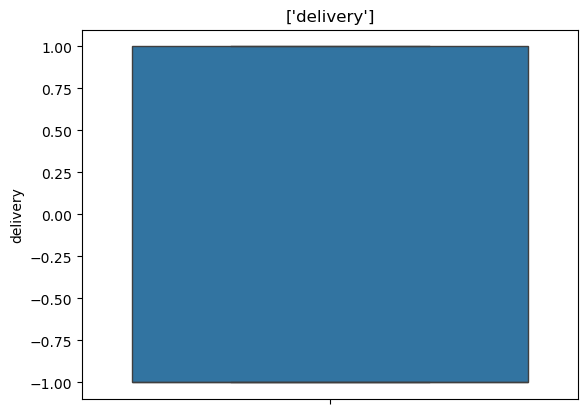

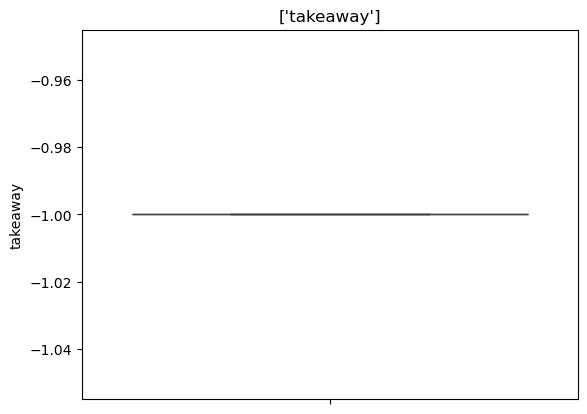

In [8]:
for i in data.select_dtypes(include= ["int64", "float64"]):
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)

    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr
    data[i]= np.where(data[i]>ul,ul,
                      np.where(data[i]<ll,ll,
                              data[i]))

                      
    sns.boxplot(data[i])
    plt.title([i])
    plt.show()

In [9]:
data["address"]= data["address"].fillna(data["address"].mode()[0])

In [10]:
data["cuisines"]= data["cuisines"].fillna(data["cuisines"].mode()[0])

In [11]:
data["timings"]= data["timings"].fillna(data["timings"].mode()[0])

In [12]:
data["opentable_support"]= data["opentable_support"].fillna(data["opentable_support"].median())

In [13]:
data.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                      0
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                     0
timings                      0
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support            0
delivery                     0
takeaway                     0
dtype: int64

In [14]:
data.drop("zipcode", axis = 1, inplace = True)

# Basic Statistics:
- Calculate and visualize the average rating of restaurants.
- Analyze the distribution of restaurant ratings to understand the overall rating
landscape.

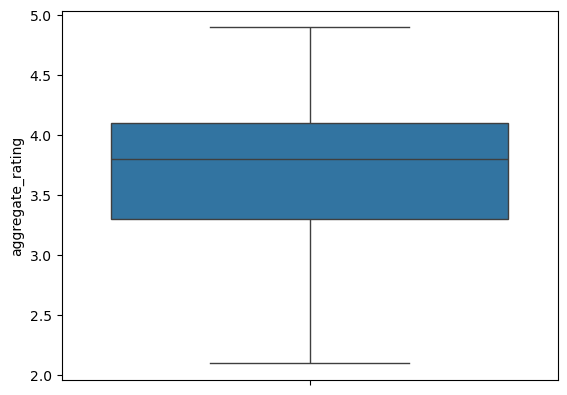

In [15]:
# Calculate and visualize the average rating of restaurants.
data["aggregate_rating"]= data["aggregate_rating"].fillna(data["aggregate_rating"].mean())
sns.boxplot(data["aggregate_rating"])
plt.show()

In [16]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.452331,77.984244,1.0,535.667332,1.852848,3.628592,239.495282,83.740210,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,7.011146,4.227194,0.0,378.328401,0.828051,0.708567,294.654997,115.748161,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,66.865918,1.0,0.000000,1.000000,2.100000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,43.860061,88.231367,1.0,1375.000000,3.500000,4.900000,881.000000,315.500000,0.0,1.000000,-1.0


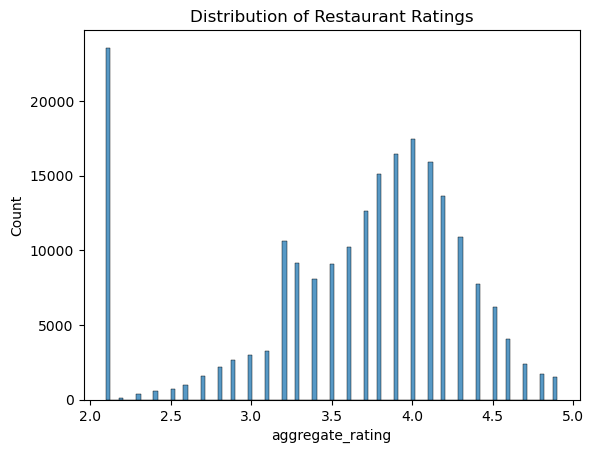

In [42]:
# distribution of restaurant ratings to understand the overall rating landscape.
sns.histplot(data["aggregate_rating"])
plt.title("Distribution of Restaurant Ratings")
plt.show()

# Location Analysis:
- Identify the city with the highest concentration of restaurants.


In [18]:
data["city"].value_counts().head(10)

city
Chennai      11630
Mumbai        6497
Bangalore     4971
Pune          4217
Lucknow       4121
Jabalpur      3994
New Delhi     3918
Jaipur        3713
Kochi         3370
Ajmer         3277
Name: count, dtype: int64

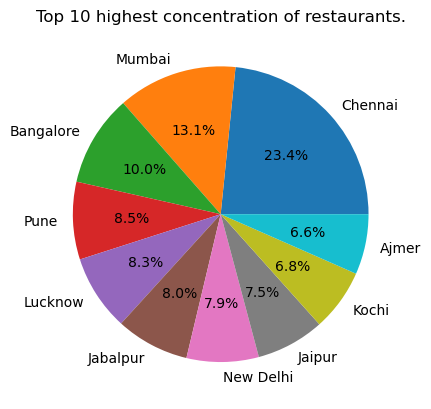

In [19]:
# the top 10 city with the highest concentration of restaurants.

y = data["city"].value_counts().head(10)
plt.title("Top 10 highest concentration of restaurants.")
plt.pie(y, labels = y.index, autopct='%1.1f%%')
plt.show()

## Cuisine Analysis:
- Determine the most popular cuisines among the listed restaurants.
- Investigate if there's a correlation between the variety of cuisines offered and
restaurant ratings.

In [20]:
# the most popular cuisines among the listed restaurants.
a = data["cuisines"].value_counts().head(10)
b = pd.DataFrame(a)
b

,count
cuisines,
North Indian,17387
Fast Food,6721
Cafe,6190
"North Indian, Chinese",5820
South Indian,5217
"Pizza, Fast Food",4075
Bakery,3238
Street Food,2837
Biryani,2118


In [21]:
data.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

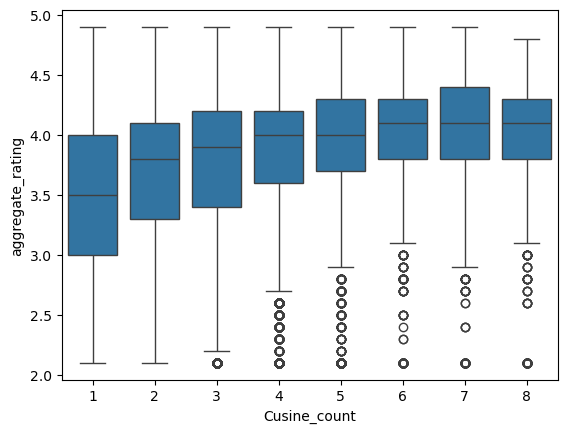

In [22]:
# correlation between the variety of cuisines offered and restaurant ratings.
data["Cusine_count"] = data["cuisines"].apply(lambda x: len(str(x).split(",")))
sns.boxplot(x = data["Cusine_count"], y = "aggregate_rating", data = data)
plt.show()

## Price Range and Rating:
- Analyze the relationship between price range and restaurant ratings.
- Visualize the average cost for two people in different price categories.}

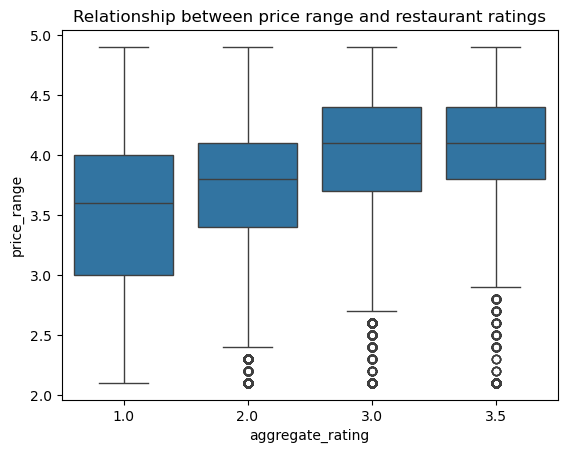

In [23]:
#  the relationship between price range and restaurant ratings.
sns.boxplot(data, x = "price_range" ,y = "aggregate_rating")
plt.title("Relationship between price range and restaurant ratings")
plt.xlabel("aggregate_rating")
plt.ylabel("price_range")
plt.show()


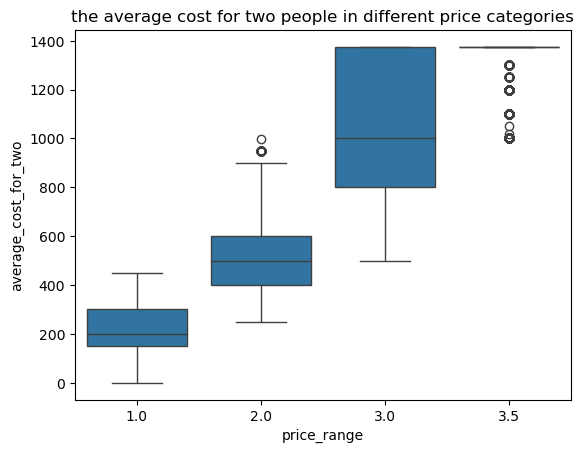

In [24]:
#  average cost for two people in different price categories.
sns.boxplot(data, x = "price_range", y = "average_cost_for_two")
plt.title("the average cost for two people in different price categories")
plt.show()

## Online Order and Table Booking:
- Investigate the impact of online order availability on restaurant ratings.
- Analyze the distribution of restaurants that offer table booking.


In [25]:
data["delivery"].value_counts()

delivery
-1.0    132573
 1.0     78335
 0.0      1036
Name: count, dtype: int64

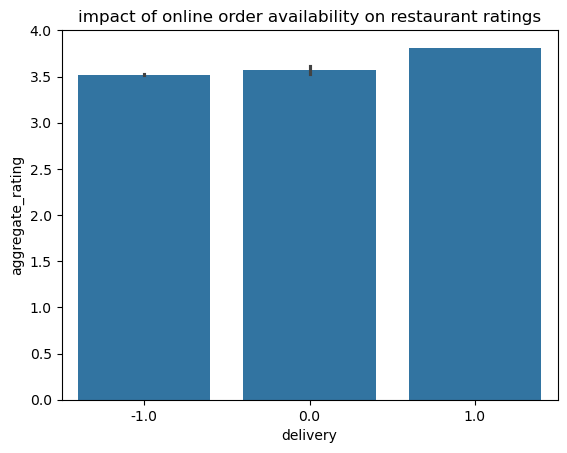

In [26]:
# the impact of online order availability on restaurant ratings.
sns.barplot(data, x = "delivery", y = "aggregate_rating")
plt.title("impact of online order availability on restaurant ratings")
plt.show()

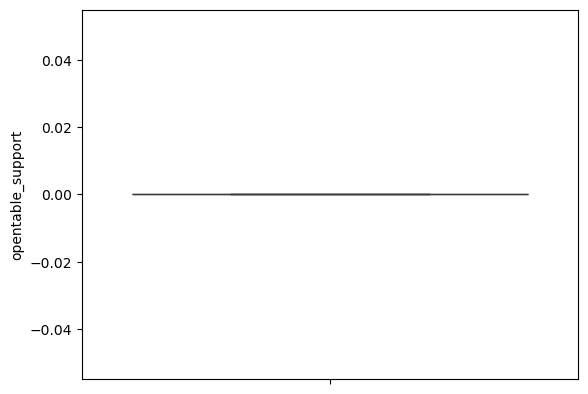

In [27]:
# the distribution of restaurants that offer table booking.
sns.boxplot(data["opentable_support"])
plt.show()

## Top Restaurant Chains:
- Identify and visualize the top restaurant chains based on the number of outlets.
- Explore the ratings of these top chains.

In [28]:
# the top restaurant chains based on the number of outlets.
a = data["name"].value_counts()
a

name
Domino's Pizza           3108
KFC                      1343
Cafe Coffee Day          1068
Pizza Hut                 936
Subway                    766
                         ... 
Night Rocket                1
Daughter's Cook House       1
Punjabi Flavours            1
Majlis  E Mughal            1
Geeta lodge                 1
Name: count, Length: 41100, dtype: int64

In [29]:
#  the ratings of these top chains.
chain_analysis = data.groupby("name").agg(
    num_outlets = ("name", "count"),
    avg_rating = ("aggregate_rating", "mean")).sort_values(by = "num_outlets", ascending = False)

In [30]:
chain_analysis.head(10)

,num_outlets,avg_rating
name,,
Domino's Pizza,3108,3.750000
KFC,1343,3.945197
Cafe Coffee Day,1068,3.152715
Pizza Hut,936,3.726389
Subway,766,3.789556
Barbeque Nation,725,4.510621
Burger King,658,3.964438
McDonald's,578,3.937889
Keventers,512,3.846484


## Restaurant Features:
- Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol
availability, etc.
- Investigate if the presence of certain features correlates with higher ratings.


In [31]:
data["highlights"].head()

0    ['Lunch', 'Takeaway Available', 'Credit Card',...
1    ['Delivery', 'No Alcohol Available', 'Dinner',...
2    ['No Alcohol Available', 'Dinner', 'Takeaway A...
3    ['Takeaway Available', 'Credit Card', 'Lunch',...
4    ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
Name: highlights, dtype: object

In [32]:
import ast

data["highlights"] = data["highlights"].apply(ast.literal_eval)

features = set([j for i in data["highlights"] for j in i])

for i in features:
    data[i] = data["highlights"].apply(lambda x: 1 if i in x else 0)


In [33]:
data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude',
       ...
       'Wifi', 'Poolside', 'Pet Friendly', 'Indoor Seating',
       'Axis Bank - Dining Delights', 'Table booking for Groups', 'Drive in',
       'Pool Table', 'Rooftop', 'Celebrity Frequented'],
      dtype='object', length=129)

In [34]:
data["Wifi"].value_counts()

Wifi
0    192868
1     19076
Name: count, dtype: int64

In [35]:
def plot(data,x):
    ab = data.groupby(x)["aggregate_rating"].mean()
    sns.barplot(ab)
    plt.title(f"{x} vs aggregate_rating")
    plt.show()

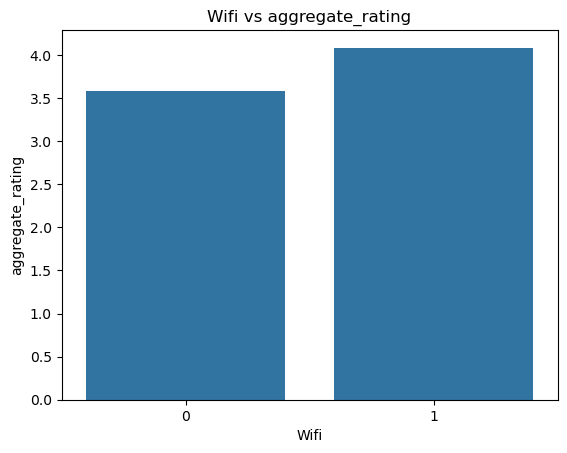

In [36]:
plot(data=data, x = "Wifi")

In [41]:
data["No Alcohol Available"].value_counts()

No Alcohol Available
0    144046
1     67898
Name: count, dtype: int64

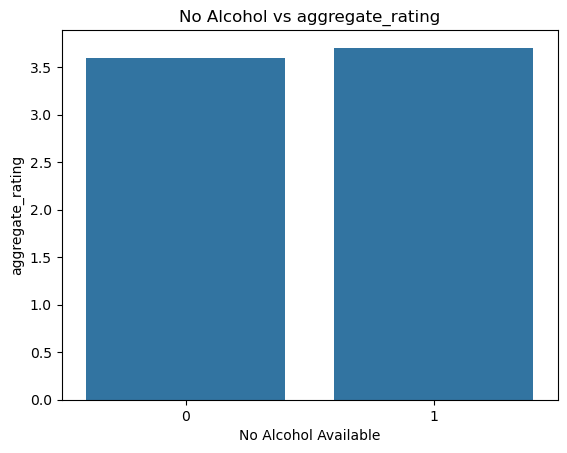

In [37]:
no_alcohal_rat = data.groupby("No Alcohol Available")["aggregate_rating"].mean()
sns.barplot(no_alcohal_rat)
plt.title("No Alcohol vs aggregate_rating")
plt.show()

## Word Cloud for Reviews:
- Create a word cloud based on customer reviews to identify common positive
and negative sentiments.
- Analyze frequently mentioned words and sentiments.


In [38]:
 !pip install wordcloud

In [39]:
from wordcloud import WordCloud

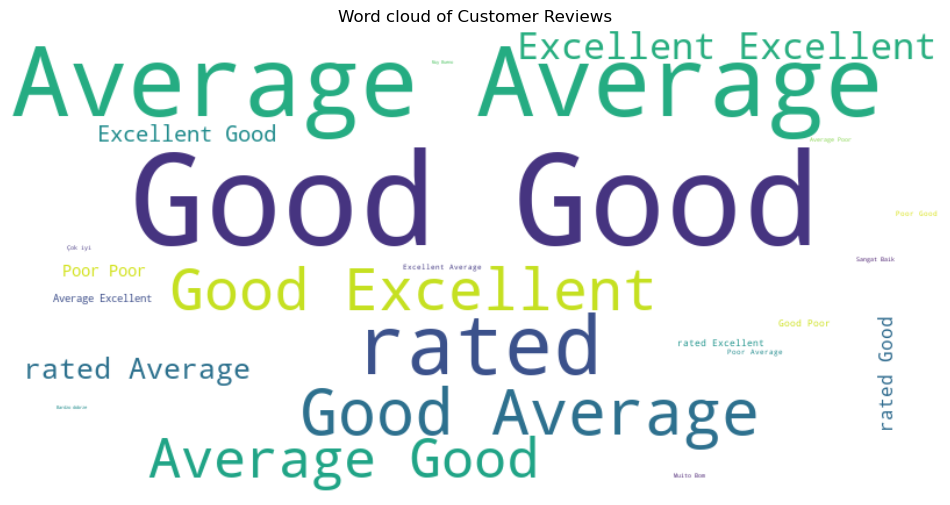

In [40]:
if "rating_text" in data.columns:
    review_txt = ' '.join(data["rating_text"].dropna().tolist())
    wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(review_txt)
    plt.figure(figsize = (12,8))
    plt.imshow(wordcloud, interpolation =  "bilinear")
    plt.axis("off")
    plt.title("Word cloud of Customer Reviews")
    plt.show()